# About [fastai](https://github.com/fastai/fastai)

fastai is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches. 

## Project Description
The aim of this project is to demonstrate the ease of image classification (cats) using the fastai library for deep learning.

### Steps

1. Install fastai
2. Import necessary libraries
3. Load data
4. Fit the model
5. Make predictions

### Requirements
**Python**: Python is an interpreted, high-level, general-purpose programming language.

**Integrated Development Environment (IDE)**: Any integrated development environment that can be used to view, edit, and run Python code, such as:

- Google Colab
- Jupyter Notebook
- Kaggle

### Packages
Please install the following packages in Python before running the code.

In [1]:
!pip install --quiet fastai

# Module containing tools for vision tasks
from fastai.vision.all import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Load Model

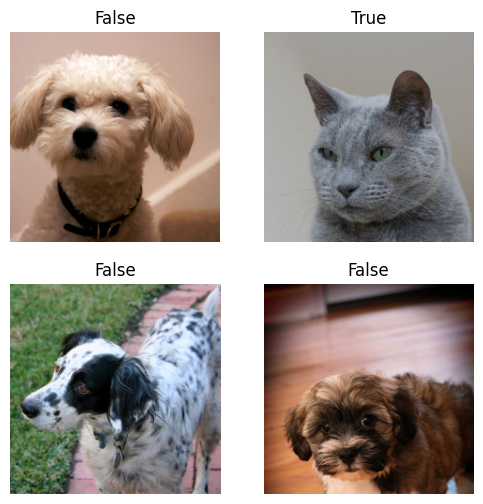

In [2]:
path = untar_data(URLs.PETS)/'images' # <- Download PETS dataset

def is_cat(x):
    '''
    This function determines whether the
    image is of a cat or a dog
    
    Note: Cat images are all in uppercase
    
    Args:
    x = Images
    
    Return:
    (False or True) Boolean
    '''
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func( # <- Module to process images
    
    path, 
    get_image_files(path),
    valid_pct=0.2, 
    seed=42,
    label_func=is_cat, # <- Applies labels to images
    item_tfms=Resize(224)
    
)

dls.show_batch(max_n=4)

In [3]:
# Module that allows the use of pretrained models
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 95.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.148080,0.024414,0.007442,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.053263,0.043295,0.013532,00:33
1,0.029246,0.020697,0.006766,00:34
2,0.015586,0.009330,0.002706,00:35


> **Note**: [Resnet34](https://arxiv.org/abs/1512.03385) is a model specialized in classifying images.

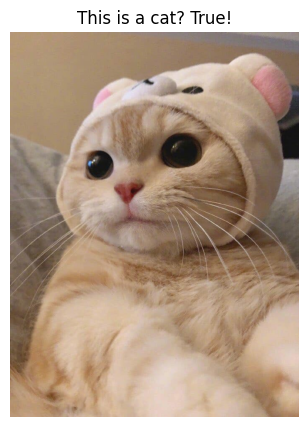

In [8]:
img = PILImage.create('/kaggle/input/cat2test/cat.jpg')

plt.figure(figsize=(12, 5))  
plt.imshow(img)
plt.axis('off')  
                      
is_cat,_,probs = learn.predict(img)
plt.title(f"This is a cat? {is_cat}!")
plt.show()

## Authors
CLL - [GitHub](https://github.com/CllsPy)

## Acknowledgements
[A beginner’s guide to Fastai’s Image Dataloaders](https://sadiva-madaan9.medium.com/a-beginners-guide-to-fastai-s-image-dataloaders-1f698c6f09eb#83dc)

[ResNet (actually) explained in under 10 minutes](https://www.youtube.com/watch?v=o_3mboe1jYI)